## D214 Capstone: Time Series Forecasting of Gold Futures Prices Using an ARIMA Model

#### Tejaswini Shekar

#### Student ID: 011840229

### Table of Contents:

A. [Research Question](#a-research-question)

B. [Data Collection](#b-data-collection)

C. [Data Extraction and Preparation](#c-data-extraction-and-preparation)

D. [Analysis](#d-analysis)

E. [Analysis Summary and Implications](#e-analysis-summary-and-implications)

F. [Sources](#f-sources)

### A. Research Question 

My research question is, "Is it possible to effectively predict gold futures prices based on historical data from the past 10 years using an ARIMA model?

The expected project outcome is an ARIMA model that can accurately predict daily gold closing prices with a low MAPE (Mean Absolute Percentage Error), and to use this model to forecast gold closing prices for the next 3 months.  

#### Hypotheses

The hypotheses defined for the analysis are;

- **H0** Null Hypothesis: 
The ARIMA model is not able to effectively predict gold prices with a low error (MAPE is not < 20%). 

- **H1** Alternate Hypothesis: 
The ARIMA model can predict gold prices effectively with a low error (MAPE < 20%).

##### Justification and Context of Research Question:

The price of gold has increased by 25% in the past year [(CBS News, 2025)](#f-sources), and does not appear to be slowing down. Geopolitical tensions worldwide have resulted in individual investors and nations buying gold to protect themselves from incurring losses. 

In such a time where gold is more popular than ever, it becomes relevant to explore methods of predicting variations in its price. By analyzing data from the past 10 years,  the patterns underlying the growth of gold futures can be uncovered, and these results can be further used to make informed decisions. It is crucial to fully understand a potential investment and its projected growth before making the commitment to invest. 


### B. Data Collection

The data required for the analysis is the daily closing prices for gold from the past 10 years (January 2015 to January 2025).

The data set used for the analysis is publicly available on the investing.com website (https://www.investing.com/commodities/gold-historical-data). It was downloaded as a csv file by entering the data range required (01/01/2015 to 01/01/2025). 

The data set has a total of 2564 records, starting from 01/02/15 till 12/31/24 (excluding holidays). There is a "Date" column and six variables, including the closing price ("Price"), opening price ("Open"), daily high ("High"), daily low ("Low"), change in price ("Vol.") and per cent change in gold price ("Change %") in USD per ounce. 

One advantage of this data-gathering method is that it is simple and easy since the data is available freely to the public.
A disadvantage is that the data selected for this analysis has only daily opening and closing prices for gold futures. It does not capture the variation in price after the market closes or hourly variation throughout the day. It also does not account for external factors that may influence prices. More in depth analysis with such data is beyond the scope of this project. 

One of the challenges encountered during data collection was that there were missing records in the data downloaded (10 years of daily data should have more than 2564 records). These most likely represent days of market closure/holidays. This was overcome in the data preparation stage by imputing the missing records using forward filling. The missing dates/rows were added to the data and the closing price for these dates were filled from the previous day's closing price. 

### C. Data Extraction and Preparation

#### Tools/Techniques Used for Data Preparation:

1. Programming language: 
Python is a powerful language in the field of data science. It has relatively simple syntax making it easy to learn. By taking advantage of its well-documented open source libraries, each step of analysis can be executed efficiently. However, it has a high memory consumption and can have a slow runtime. 

2. Programming environment: Jupyter Notebook in Visual Studio Code.
Jupyter notebooks allow code to be run cell by cell and combine code with markdown/text. Since they contain the entire workflow of code, visualizations and textual explanations, they are ideal for data analysis. 
A disadvantage of jupyter notebooks is that they can become slow when processing large amounts of data. Also, it can be difficult to manage verson control within jupyter notebooks.

3. Python Libraries:
Open source libraries/packages in python have vast amounts of pre-written code that can be leveraged to save time and improve efficiency. They have robust documentation and can be used to avoid writing code from scratch. One disadvantage of using libraries is that execution speed may be compromised when libraries are used in place of more specific, optimized code. 

    - pandas: Provides a framework for the data set, making it easy to manipulate. It also integrates well with NumpPy and MatPlotLib. However, it can consume a lot of memory and some operations are not as fast as NumPy. 
    - NumPy: Used to perform mathematical operations and is used under the hood for other python libraries like pandas. It allows for fast computation even on large datasets. However, it has limited built-in support for handling missing values and cannot do much beyond basic calculations. 
    - Datetime: Used to convert the data type of the date column to datetime format to make graphing and analysis easier. It can be a little difficult to use when dealing with different timezones or calendar systems. 
    - MatPlotLib: Used to plot graphs of the data (eg. gold closing prices over the last 10 years). It has a wide range of plots and customizations. However, it is not very concise when creating complex visualizations and is not the first choice for interactive graphs. 
    - re: Used to identify regular expressions in the data, making cleaning of data easier (eg. removal of punctuation, percent signs). Its pattern matching capabilities make searching for and replacing text simple and straightforward. However, the learning curve for understanding regular expressions is steep. 
    - statsmodels 
        adfuller: The Augmented Dickey-Fuller test is used to check whether the data is stationary (if the data is not stationary, the order of differencing required to make data stationary needs to be determined before analysis). 
        train_test_split: Used to split the data into training and test data sets. This helps improve model accuracy and decrease overfitting. However, the results may be unreliable if the data set is too small [(Galarnyk, 2025)](#f-sources).


#### Steps of Data Preparation:

1. Import libararies/packages.

2. Read csv file into pandas dataframe.

3. Get an overview of the data using .info(), .head() and .shape.  

4. Remove punctuation and irregular characters.

5. Change data type of "Date" column to datetime format and set it as the index column. 

6. Check for missing dates/records. Insert missing dates and impute the values for daily closing price ("Price") by using the previous day's closing price. This method is called forward filling. 

7. Get an overview of the cleaned data. Calculate the summary statistics of data. 

8. Visualize the cleaned data with a graph showing the daily closing prices of the gold futures over the course of 10 years. 

9. Split the data into training and testing data sets in the ratio 80% train and 20% test as per industry standards.

10. Export the cleaned data as csv files. 


The code and output of data cleaning is provided below. 

In [69]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [70]:
# read csv into dataframe 
df = pd.read_csv("./Gold Futures Historical Data 2015-2025.csv")

#### Overview of Data

In [71]:
# check number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2564 non-null   object
 1   Price     2564 non-null   object
 2   Open      2564 non-null   object
 3   High      2564 non-null   object
 4   Low       2564 non-null   object
 5   Vol.      2562 non-null   object
 6   Change %  2564 non-null   object
dtypes: object(7)
memory usage: 140.3+ KB


In [72]:
df.shape

(2564, 7)

In [73]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2024,"2,641.00","2,620.00","2,642.00","2,614.30",86.29K,0.87%
1,12/30/2024,"2,618.10","2,636.10","2,640.70","2,608.40",110.92K,-0.01%
2,12/27/2024,"2,618.40","2,639.70","2,639.70","2,612.10",0.64K,-0.83%
3,12/26/2024,"2,640.30","2,623.30","2,642.40","2,622.80",1.40K,0.67%
4,12/24/2024,"2,622.80","2,616.50","2,622.70","2,612.50",0.42K,0.28%
5,12/23/2024,"2,615.50","2,627.30","2,632.90","2,610.20",0.56K,-0.65%
6,12/20/2024,"2,632.50","2,597.70","2,640.70","2,595.70",0.51K,1.41%
7,12/19/2024,"2,596.00","2,586.00","2,625.00","2,585.90",0.90K,-1.70%
8,12/18/2024,"2,640.80","2,651.20","2,654.30","2,587.20",0.88K,-0.33%
9,12/17/2024,"2,649.60","2,657.20","2,662.50","2,634.30",0.63K,-0.28%


#### Remove Punctuation and Irregular Characters

In [74]:
# remove commas and percent symbols from data, ensure percent change column is in correct format 
df[["Price", "Open", "High", "Low", "Vol.", "Change %"]] = df[["Price", "Open", "High", "Low", "Vol.", "Change %"]].replace({',': '', 'K': '' , '%': ''}, regex=True).astype(float)

df["Change %"] = df["Change %"]/100

#### Change Date Column to Datetime Format

In [75]:
# change data type of date column to date-time and set it to index
df["Date"] = pd.to_datetime(df["Date"]) 

# set date colum as index
df.set_index('Date', inplace=True)

#### Identify and Impute Missing Dates by Forward Filling

In [76]:
# identify missing values/any gaps in measurement in range of dates 
date_range = pd.date_range(start="2015-01-01", end="2025-01-01", freq="D")
missing_dates = date_range[~date_range.isin(df.index)]
print(missing_dates)

DatetimeIndex(['2015-01-01', '2015-01-03', '2015-01-04', '2015-01-10',
               '2015-01-11', '2015-01-17', '2015-01-18', '2015-01-20',
               '2015-01-24', '2015-01-25',
               ...
               '2024-12-07', '2024-12-08', '2024-12-14', '2024-12-15',
               '2024-12-21', '2024-12-22', '2024-12-25', '2024-12-28',
               '2024-12-29', '2025-01-01'],
              dtype='datetime64[ns]', length=1090, freq=None)


In [77]:
print("The total number of missing dates/records are", len(missing_dates))

The total number of missing dates/records are 1090


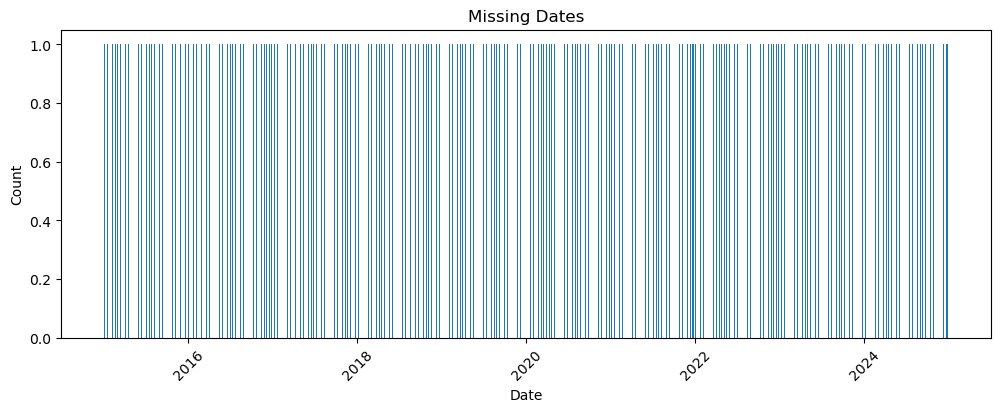

In [78]:
# visualize missing dates
plt.figure(figsize=(12, 4))
plt.bar(missing_dates, [1] * len(missing_dates))
plt.title("Missing Dates")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [79]:
# forward fill gaps in measurement (days of market holidays) with previous days closing price 
df_reindexed = df.reindex(date_range)
df_forward_filled = df_reindexed.fillna(method="ffill")

In [80]:
# Check for null values after imputing
df_forward_filled.isnull().sum()

Price       1
Open        1
High        1
Low         1
Vol.        1
Change %    1
dtype: int64

In [81]:
# remove first row of null values since there is no previous date to forward fill from
df_forward_filled = df_forward_filled.drop(pd.Timestamp("2015-01-01"))

#### Cleaned Data Set

In [82]:
# overview of cleaned data
df_forward_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2015-01-02 to 2025-01-01
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3653 non-null   float64
 1   Open      3653 non-null   float64
 2   High      3653 non-null   float64
 3   Low       3653 non-null   float64
 4   Vol.      3653 non-null   float64
 5   Change %  3653 non-null   float64
dtypes: float64(6)
memory usage: 199.8 KB


In [83]:
df_forward_filled.shape

(3653, 6)

In [84]:
df_forward_filled.head()

,Price,Open,High,Low,Vol.,Change %
2015-01-02,1186.2,1184.0,1194.9,1167.3,120.68,0.0018
2015-01-03,1186.2,1184.0,1194.9,1167.3,120.68,0.0018
2015-01-04,1186.2,1184.0,1194.9,1167.3,120.68,0.0018
2015-01-05,1204.0,1187.8,1207.5,1177.8,149.11,0.0150
2015-01-06,1219.4,1204.0,1223.3,1201.6,190.36,0.0128


In [85]:
df_forward_filled.tail()

,Price,Open,High,Low,Vol.,Change %
2024-12-28,2618.4,2639.7,2639.7,2612.1,0.64,-0.0083
2024-12-29,2618.4,2639.7,2639.7,2612.1,0.64,-0.0083
2024-12-30,2618.1,2636.1,2640.7,2608.4,110.92,-0.0001
2024-12-31,2641.0,2620.0,2642.0,2614.3,86.29,0.0087
2025-01-01,2641.0,2620.0,2642.0,2614.3,86.29,0.0087


#### Summary Statistics

In [86]:
# summary stats of cleaned data
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,2564.000000,2564.000000,2564.000000,2564.000000,2562.000000,2564.000000
mean,1606.882332,1606.936681,1617.771880,1595.916634,128.136046,0.000355
std,393.158796,393.081129,396.366497,389.754720,130.958570,0.009184
min,1049.600000,1051.500000,1062.700000,1045.400000,0.120000,-0.049900
25%,1265.525000,1265.100000,1272.950000,1257.475000,1.100000,-0.004100
50%,1550.550000,1549.200000,1558.850000,1531.050000,129.035000,0.000300
75%,1872.300000,1872.650000,1885.775000,1860.400000,220.930000,0.005400
max,2800.800000,2799.100000,2801.800000,2782.400000,816.530000,0.059500


#### Visualize the Time Series

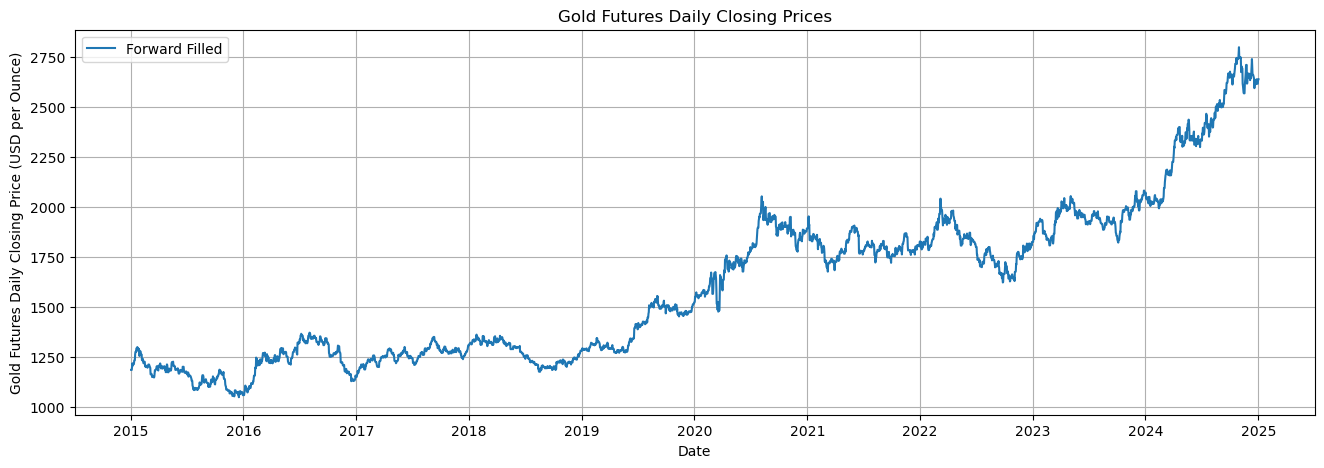

In [87]:
# visualize the cleaned time series
plt.figure(figsize = [16,5])
plt.plot(df_forward_filled["Price"], label="Forward Filled")
plt.title("Gold Futures Daily Closing Prices")
plt.xlabel("Date")
plt.ylabel("Gold Futures Daily Closing Price (USD per Ounce)")
plt.legend()
plt.grid()
plt.show()

#### Split Data into Training and Test Datasets

In [92]:
# split cleaned data into training (80%) and test (20%) datasets
df_train, df_test = train_test_split(df_forward_filled, shuffle=False, test_size=0.2)

print("df_train shape: ", df_train.shape)
print("df_test shape: ", df_test.shape)

df_train shape:  (2922, 6)
df_test shape:  (731, 6)


#### Export Processed Data

In [93]:
# export cleaned data as csv files
df_forward_filled.to_csv("gold_prices_clean.csv")
df_train.to_csv("train_gold_prices.csv")
df_test.to_csv("test_gold_prices.csv")

### D. Analysis

The analysis technique chosen for this project is time-series forecasting using an ARIMA model. The evaluation criteria is MAPE (Mean Absolute Percentage Error). 

An ARIMA model is appropriate for this analysis because it can analyze historical data to predict future prices. The autoregressive, differencing and moving average parts of ARIMA together can capture the changing patterns and trends in stock return data [(Hardikkumar, 2024)](#f-sources). It is simple and easy to build. A disadvantage of ARIMA is that it cannot handle complex, non-linear market dynamics since it only captures linear relationships. It is also sensitive to outliers [(Pathan, 2024)](#f-sources).

The final model will be evaluated using MAPE. MAPE (Mean Absolute Percentage Error) expresses error as a percentage of the actual values. It is scale-independent and can be used to evaluate ARIMA model performance. The best range for MAPE depends on the industry, but a lower value is better. In general, MAPE between 10% - 20% is considered to be good [(Juan et al, 2013)](#f-sources). 
However, one disadvantage of MAPE is that it can lead to infinite or undefined values when the true value is zero. It can also be skewed by outliers. 

#### Stationarity
Prior to building the ARIMA model, the data will first be checked for stationarity using the Augmented Dickey Fuller test. Since this data set is not stationary, it will be differenced and the test will be rerun to ensure stationarity. The order of differencing determined is d=1.

In [116]:
# check data for stationarity using adf test
result = adfuller(df_forward_filled["Price"])
print("The test statistic is: ", result[0])
print("The p-value is: ", result[1])
print("The critical values are: ", result[4])

if result[1]<+0.05: 
    print("Reject the null hypothesis; the time series is stationary.")
else:
    print("Fail to reject the null hypothesis; the time series is non-stationary.")

The test statistic is:  1.174293747762679
The p-value is:  0.9958033750674723
The critical values are:  {'1%': -3.432154725699155, '5%': -2.8623374271161723, '10%': -2.567194482813802}
Fail to reject the null hypothesis; the time series is non-stationary.


In [117]:
# difference the data to make it stationary
df_diff = df_forward_filled.diff()

# drop first row of null values after differencing
df_diff.dropna(inplace=True)

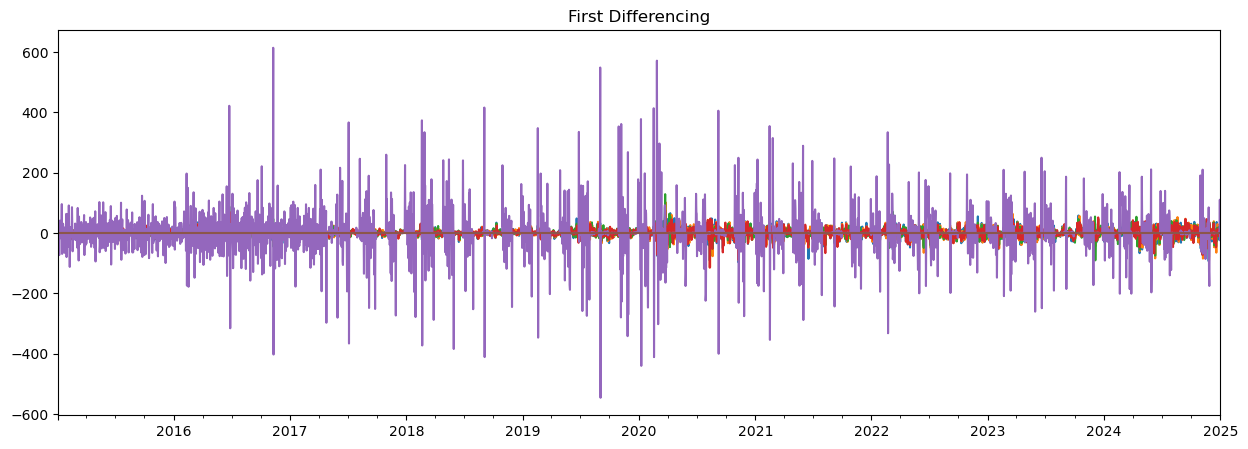

In [118]:
# visualize differenced data to ensure it is stationary
df_diff.plot(figsize=(15,5), legend=False)
plt.title("First Differencing")
plt.show()

The graph of the differenced data above looks like white noise. Therefore can be inferred that the data is now stationary. 

This can be confirmed by rerunning the Augmented Dickey-Fuller test on the differenced data. 

In [119]:
# check differenced data for stationarity using adf test
result_diff = adfuller(df_diff["Price"])
print("The test statistic is: ", result_diff[0])
print("The p-value is: ", result_diff[1])
print("The critical values are: ", result_diff[4])

if result_diff[1]<=0.05: 
    print("Reject the null hypothesis; the time series is stationary.")
else:
    print("Fail to reject the null hypothesis; the time series is non-stationary.")

The test statistic is:  -13.498544077298323
The p-value is:  3.0083994964643063e-25
The critical values are:  {'1%': -3.432154725699155, '5%': -2.8623374271161723, '10%': -2.567194482813802}
Reject the null hypothesis; the time series is stationary.


Since the null hypothesis is rejected in the Augmented Dickey-Fuller test, the differenced data is now stationary.  

The order of differencing required to make the data stationary is 1 (d=1). 

#### Decomposition of the Time Series

The trend of a time series is determined by analyzing the overall direction of the data over a given time period. From the decomposed time series, it is clear that gold futures show an increasing trend. 

Seasonality refers to cycles that repeat regularly over time (daily, weekly, monthly, quarterly, yearly, etc) at the same frequency. The decomposition shows that gold prices show yearly variation along with the increasing trend. 

The residual plot does not show any obvious patterns. They are also confirmed to be stationary by using the AD Fuller test. This means that the decomposition has captured the trends and seasonality in the time series well. 

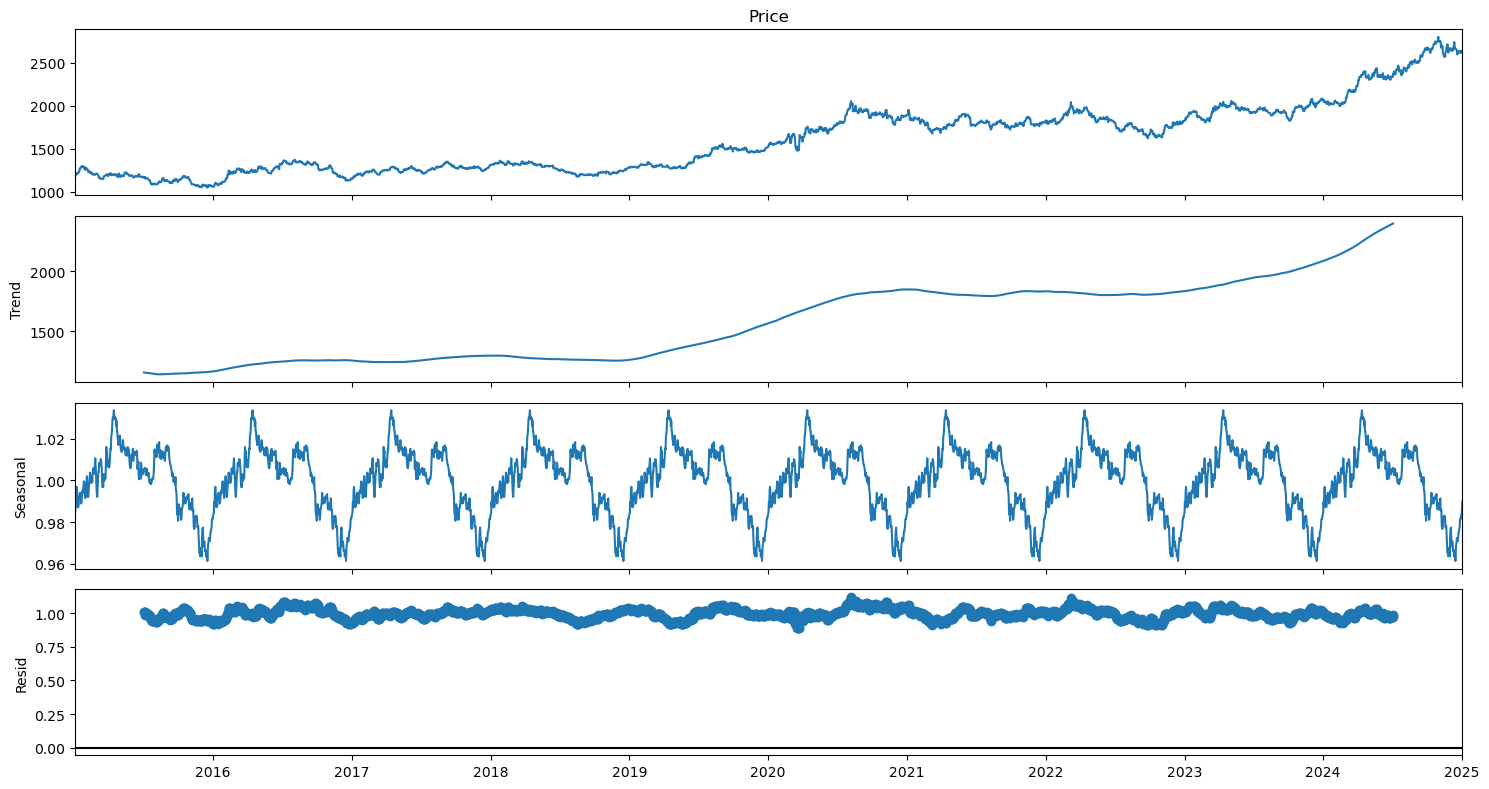

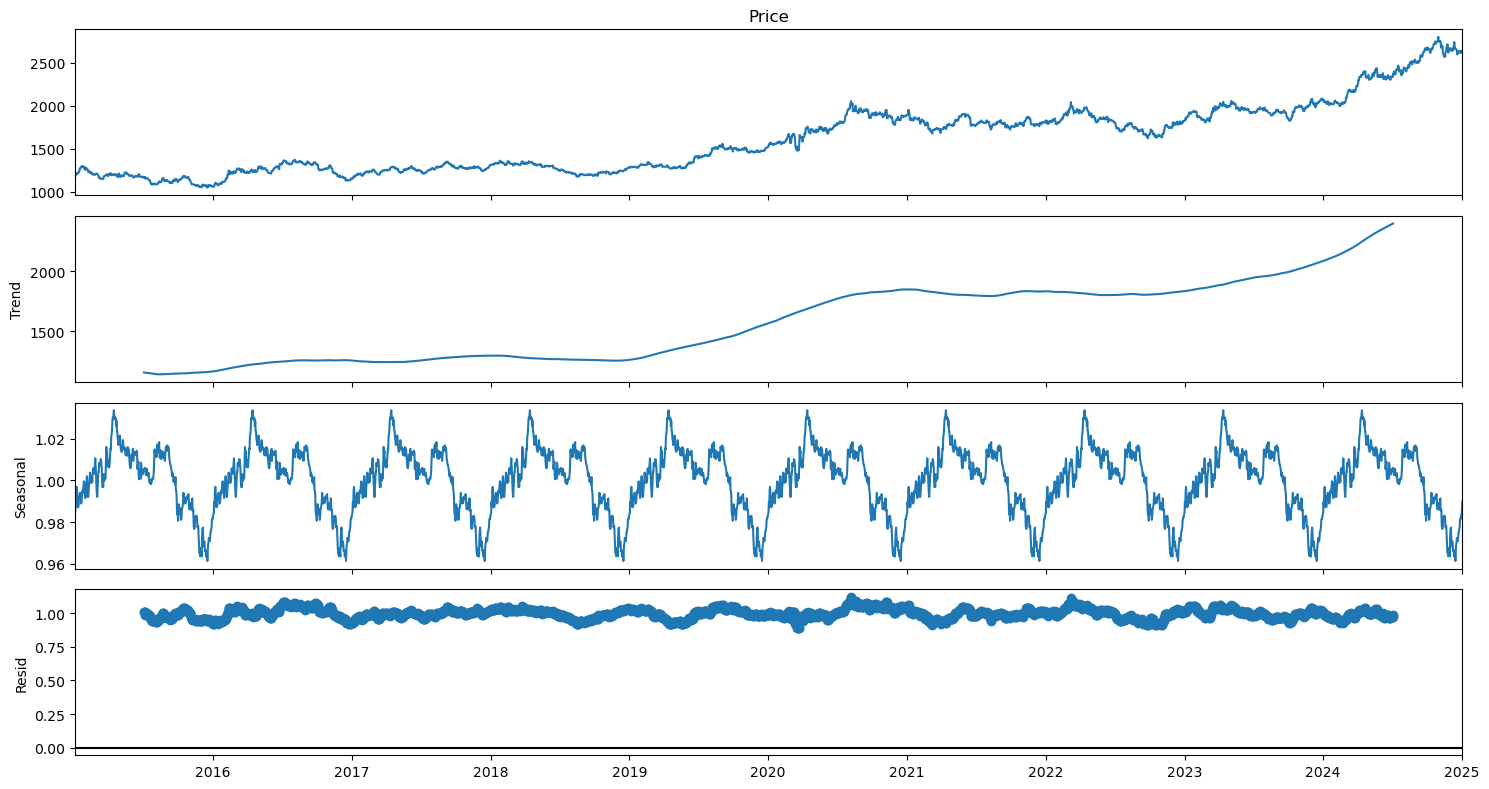

In [94]:
# plot decomposition of time series
decomposed_df = seasonal_decompose(df_forward_filled["Price"], model="multiplicative", period=365)
decomposed_df.plot()

In [95]:
# confirm residuals are stationary using ad fuller test
resid = decomposed_df.resid.dropna()
resid_results = adfuller(resid)
print("The test statistic is: ", resid_results[0])
print("The p-value is: ", resid_results[1])
print("The critical values are: ", resid_results[4])

if resid_results[1]<+0.05: 
    print("Reject the null hypothesis; the residuals are stationary.")
else:
    print("Fail to reject the null hypothesis; the residuals are not stationary.")

The test statistic is:  -5.197759138319588
The p-value is:  8.885173172097878e-06
The critical values are:  {'1%': -3.4323550398975238, '5%': -2.8624259071506413, '10%': -2.5672415871937777}
Reject the null hypothesis; the residuals are stationary.


#### Autocorrelation Functions

ACF (autocorrelation function) and PACF (partial autocorrelation function) can help determine the order of the ARIMA model as well as the stationarity of the data. 
ACF determines the moving average component (q) and PACF determines the autoregressive component (p). 

For a stationary time series, the ACF will drop to zero quickly, while the ACF of non-stationary data decreases slowly. In this plot, the ACF of the differenced data quickly drops to zero, indicating that the data is stationary.

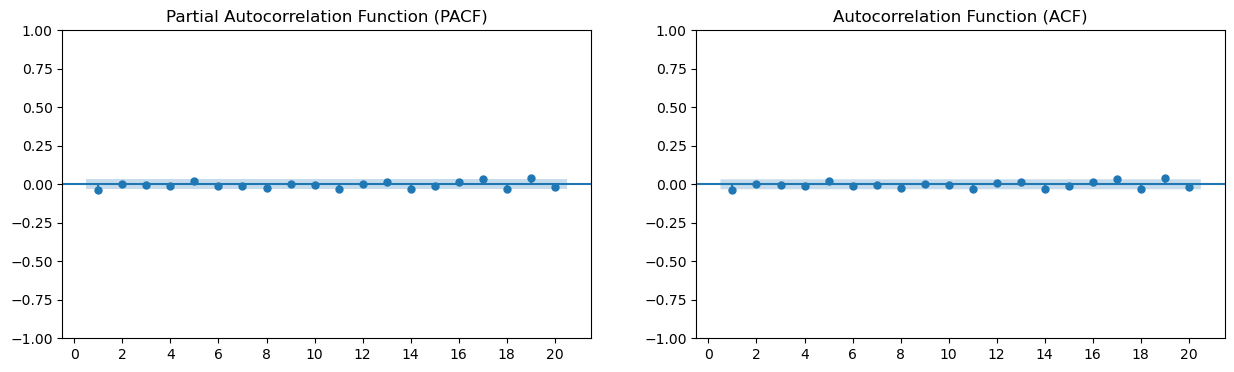

In [96]:
# plot acf, pacf on the stationary data to determine q and p values
plt.rcParams.update({'figure.figsize': (15, 4)})
ticks = range(0, 21, 2)
fig, axes = plt.subplots(1, 2)
plot_pacf(df_diff["Price"], lags = 20, ax=axes[0],  zero=False)
axes[0].set_title('Partial Autocorrelation Function (PACF)')
axes[0].set_xticks(ticks)

plot_acf(df_diff["Price"], lags = 20, ax=axes[1], zero=False)
axes[1].set_title('Autocorrelation Function (ACF)')
axes[1].set_xticks(ticks) 

plt.show()

#### Find Best Order of ARIMA with Lowest AIC

The best order of ARIMA will be selected based on which combination of model parameters result in the lowest AIC (Akaike Information Criterion). Combinations of p and q are run in a for loop to find the lowest AIC score.

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
# find the best order of ARIMA with the smallest AIC
best_aic=np.Infinity
best_order=None
best_model=None
rng=range(3)
for p in rng:
    for q in rng:
        try:
          temp_model=ARIMA(df_train["Price"], order=(p,1,q))
          results=temp_model.fit()
          temp_aic=results.aic
          print(p,q,results.aic)
          if temp_aic<best_aic:
            best_aic=temp_aic
            best_order=(p, 1, q)
            best_model=temp_model
        except:
           print(p,q,None,None)

0 0 22827.46240981111
0 1 22826.846478810905
0 2 22828.845903247548
1 0 22826.849961070362
1 1 22828.846655273723
1 2 22826.801610937237
2 0 22828.841152878038
2 1 22830.844356625996
2 2 22826.47950773919


In [99]:
# print best model parameters
print("Best AIC: ", best_aic, " Best Order: ", best_order)

Best AIC:  22826.47950773919  Best Order:  (2, 1, 2)


#### Fit ARIMA Model

In [100]:
# create and fit ARIMA model with the parameters determined by AIC with p=2, d=1, and q=2
model = ARIMA(df_train["Price"], order=(2,1,2)) 
results = model_final.fit()

#### Best Model Output Summary

In [101]:
# print final model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2922
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11408.240
Date:                Tue, 11 Mar 2025   AIC                          22826.480
Time:                        00:44:36   BIC                          22856.378
Sample:                    01-02-2015   HQIC                         22837.248
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6809      0.094    -17.902      0.000      -1.865      -1.497
ar.L2         -0.8323      0.087     -9.546      0.000      -1.003      -0.661
ma.L1          1.6640      0.100     16.643      0.000       1.468       1.860
ma.L2          0.8065      0.094      8.626      0.000       0.623       0.990
sigma2       144.5040      1.592     90.797      0.000     141.385     147.623
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):             12086.16
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.82   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
print("The AIC of the final model is ", results.aic)

The AIC of the final model is  22826.47950773919


#### Model Evalutaion:

#### Diagnostic Plots

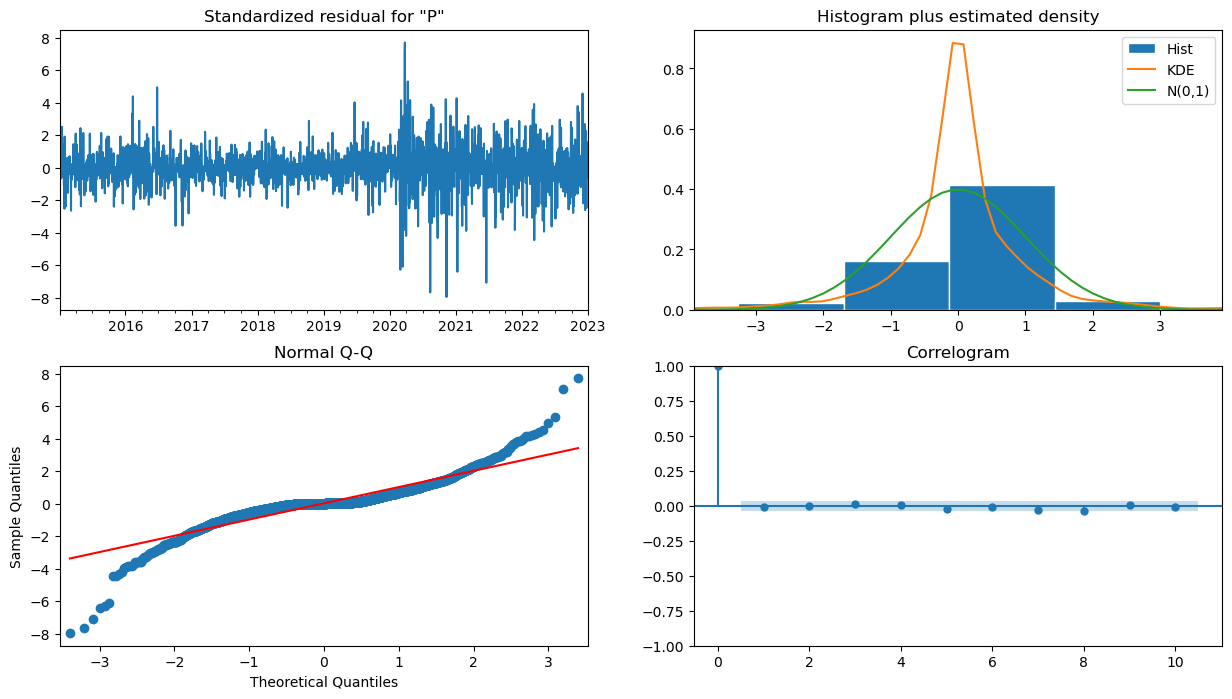

In [103]:
# diagnostic plots
plt.rcParams.update({'figure.figsize': (15, 8)})
results.plot_diagnostics().show()

The upper left plot shows uniform variance of the residual errors with fluctuation around a mean of zero, resembling white noise.

The density plot at the upper right shows a normal distribution with a mean of zero.

The bottom left Q-Q plot has most of the points aligned along the red line. Any deviations from this would indicate a skewed distribution. 

The bottom right plot shows the ACF of the residuals. The residuals are not autocorrelated, i.e., there is no remaining pattern in the residuals that was missed by the model. 

Hence, we can conclude that the ARIMA model captures the variation and patterns in the time series well. 

#### Compare ARIMA Model Forecast with Actual Test Data

In [104]:
# Get the forecasted values for test data and confidence interval
test_len = len(df_test["Price"])
test_forecast = results.get_forecast(steps=test_len, dynamic=True)

# Extract the forecasted values (predicted mean)
forecasted_mean = test_forecast.predicted_mean 

# Extract the confidence intervals (lower and upper bounds)
conf_int = test_forecast.conf_int(alpha=0.05) 

In [105]:
print(forecasted_mean)

2023-01-02    1824.891184
2023-01-03    1826.060223
2023-01-04    1825.184468
2023-01-05    1825.683573
2023-01-06    1825.573488
                 ...     
2024-12-28    1825.534001
2024-12-29    1825.534001
2024-12-30    1825.534001
2024-12-31    1825.534001
2025-01-01    1825.534001
Freq: D, Name: predicted_mean, Length: 731, dtype: float64


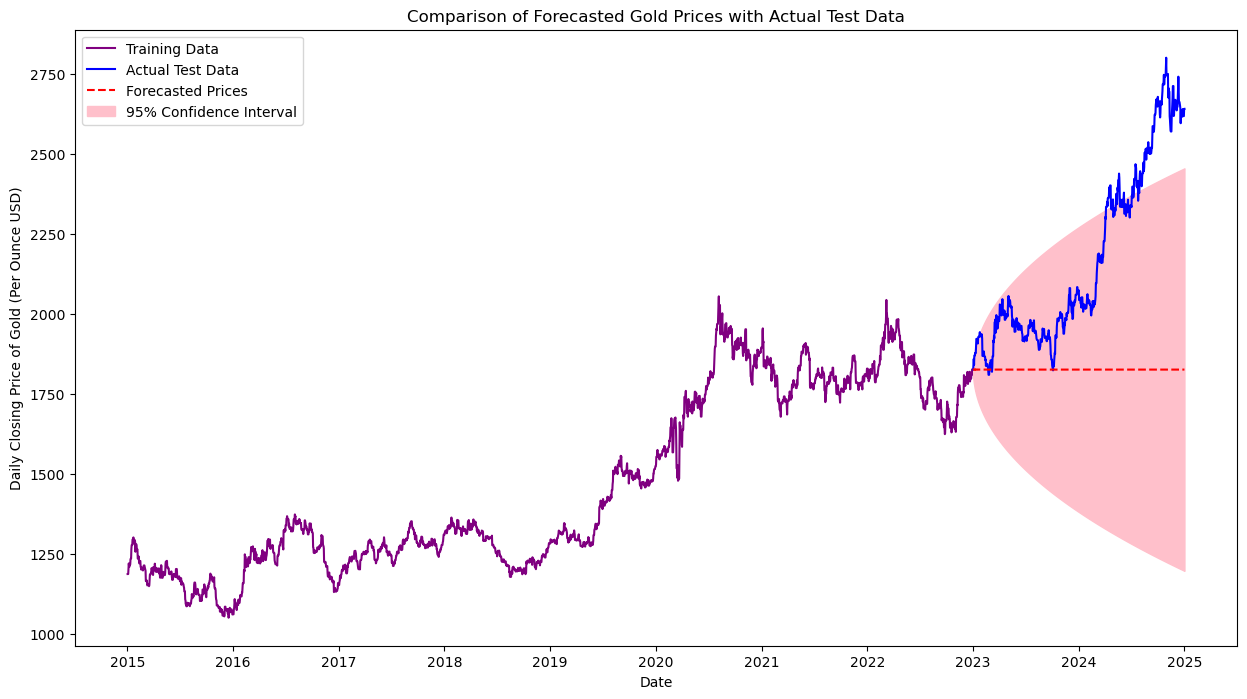

In [106]:
# Plot the predictions with training and test data and 95% confidence interval
plt.plot(df_train["Price"], color='purple', label='Training Data')
plt.plot(df_test["Price"], color='blue', label='Actual Test Data')
plt.plot(forecasted_mean, color='red', label='Forecasted Prices', linestyle='dashed')
plt.fill_between(forecasted_mean.index, conf_int['lower Price'], conf_int['upper Price'], color='pink', label='95% Confidence Interval')

plt.legend()
plt.title('Comparison of Forecasted Gold Prices with Actual Test Data')
plt.xlabel("Date")
plt.ylabel("Daily Closing Price of Gold (Per Ounce USD)")

plt.show()

On comparing the model forecast with the test data set, it is clear that while the first half of the test data lies within the predicted 95% confidence interval, the latter part of the test data shows a sharp rise above the forecast. 

#### Model Evaluation Metrics

In [107]:
# RMSE
rmse = np.sqrt(mean_squared_error(df_test["Price"], forecasted_mean))
print(" Root Mean Squared Error (RMSE) : ", rmse)

 Root Mean Squared Error (RMSE) :  444.39160014245476


In [108]:
# mean absolute error of the final model
best_residuals = results.resid
mae = np.mean(best_residuals)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.6274607897726622


In [109]:
# Calculate absolute percentage error for each forecasted value
actual_values = df_test["Price"]
forecasted_values = forecasted_mean
absolute_percentage_error = ((actual_values - forecasted_values) / actual_values) * 100

mape = np.mean(absolute_percentage_error)
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Absolute Percentage Error (MAPE):  14.68495173684202


#### Forecasting Using ARIMA

In [110]:
# fit and train the ARIMA model on the entire original data set (both train and test data)
model_future = ARIMA(df_forward_filled["Price"], order=(2,1,2)) 
results_future = model_future.fit()

In [111]:
# print ARIMA model results for entire data set
results_future.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 3653
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14588.194
Date:                Tue, 11 Mar 2025   AIC                          29186.388
Time:                        00:44:37   BIC                          29217.404
Sample:                    01-02-2015   HQIC                         29197.434
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0181     24.716     -0.001      0.999     -48.461      48.425
ar.L2          0.0022      3.365      0.001      0.999      -6.593       6.598
ma.L1         -0.0182     24.717     -0.001      0.999     -48.462      48.426
ma.L2          0.0021      2.475      0.001      0.999      -4.849       4.853
sigma2       172.7636      1.841     93.851      0.000     169.156     176.372
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10205.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.25   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
# forecast daily closing prices of gold for the next 3 months
future_forecast = results_future.get_forecast(steps=90)
conf_int_future = future_forecast.conf_int(alpha=0.05)

In [113]:
# print the forecasted daily closing prices for January 2025 - March 2025 
print("January 1, 2025 - March 31, 2025 Gold Price Forecast (USD per ounce): \n", future_forecast.predicted_mean)

January 1, 2025 - March 31, 2025 Gold Price Forecast (USD per ounce): 
 2025-01-02    2641.082399
2025-01-03    2641.082657
2025-01-04    2641.082830
2025-01-05    2641.082827
2025-01-06    2641.082828
                 ...     
2025-03-28    2641.082828
2025-03-29    2641.082828
2025-03-30    2641.082828
2025-03-31    2641.082828
2025-04-01    2641.082828
Freq: D, Name: predicted_mean, Length: 90, dtype: float64


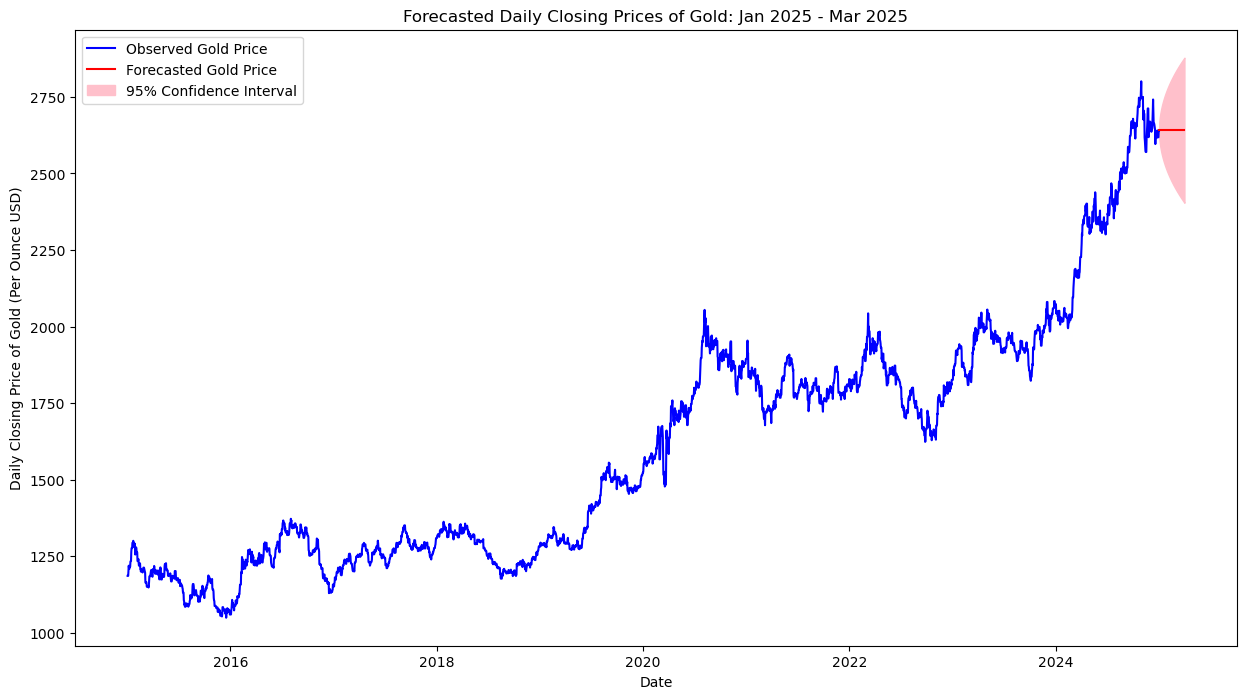

In [114]:
# Plot the forecasted gold price for January 2025 - March 2025  
plt.plot(df_forward_filled["Price"], color='blue', label='Observed Gold Price')
plt.plot(future_forecast.predicted_mean, color='red', label='Forecasted Gold Price')
plt.fill_between(future_forecast.predicted_mean.index, conf_int_future["lower Price"], conf_int_future["upper Price"], color="pink", label='95% Confidence Interval')

plt.legend()
plt.title('Forecasted Daily Closing Prices of Gold: Jan 2025 - Mar 2025')
plt.xlabel("Date")
plt.ylabel("Daily Closing Price of Gold (Per Ounce USD)")

plt.show()

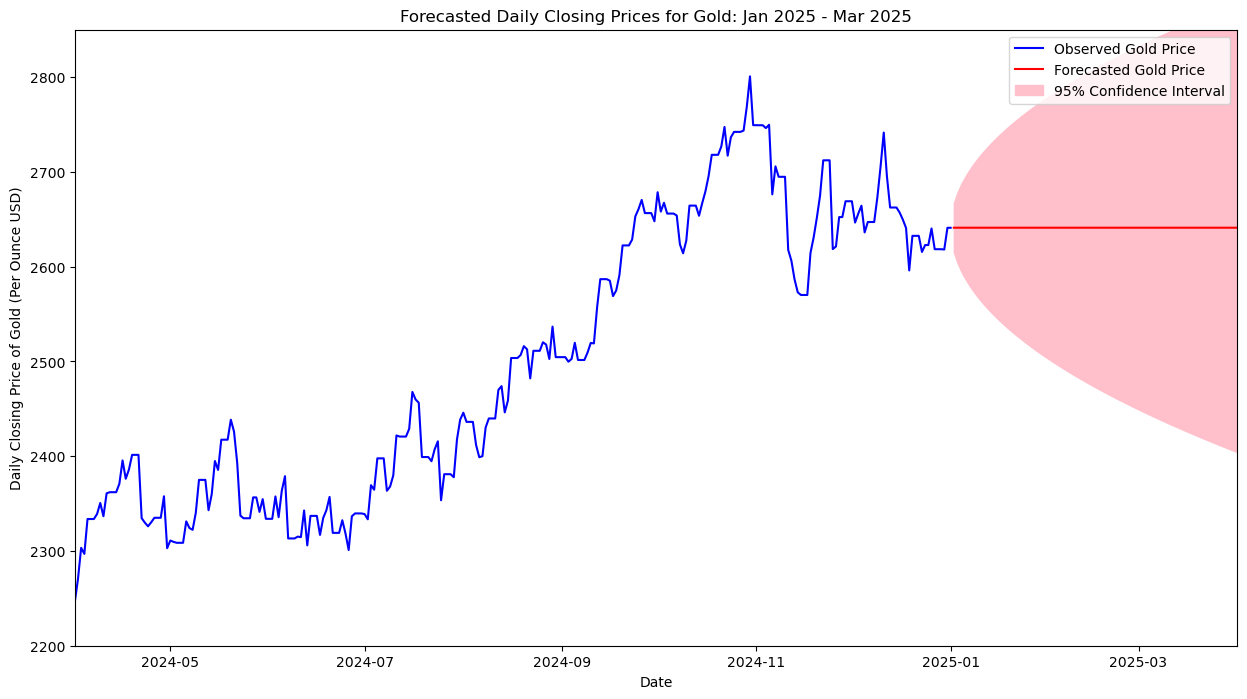

In [115]:
# closer look at forecasted prices
plt.plot(df_forward_filled["Price"], color='blue', label='Observed Gold Price')
plt.plot(future_forecast.predicted_mean, color='red', label='Forecasted Gold Price')
plt.fill_between(future_forecast.predicted_mean.index, conf_int_future["lower Price"], conf_int_future["upper Price"], color="pink", label='95% Confidence Interval')

plt.legend()
plt.title('Forecasted Daily Closing Prices for Gold: Jan 2025 - Mar 2025')
plt.xlabel("Date")
plt.ylabel("Daily Closing Price of Gold (Per Ounce USD)")
plt.xlim([datetime.date(2024, 4, 1), datetime.date(2025, 4, 1)])
plt.ylim(2200, 2850)

plt.show()

The model forecast shows an average gold price of about 2641 USD per ounce for the next 3 months (Jan-Mar 2025).

### E. Analysis Summary and Implications
The results of the analysis show that the ARIMA model was able to capture the trends in the gold futures prices well as per the evaluation metrics. The plotted residual did not show any significant patterns, were not autocorrelated and had a mean of zero and uniform variance. 
Also, the RMSE and MAE of the final model were 444.39 and 0.627 respectively. The MAPE was 14.68%. Therefore the null hypothesis is rejected and we accept the alternative hypothesis that it is possible to build an ARIMA model that can effectively forecast gold prices with MAPE <20%.

**Limitation:**
One limitation of the analysis is that ARIMA assumes linearity and stationarity. The true nature of gold prices is much more erratic with numerous global factors contributing to its spikes and dips. These complex relationships cannot be accounted for by the ARIMA model. Also, ARIMA is highly sensitive to outliers and missing values. These factors influence the final accuracy of the model and the reliability of the results.  

**Recommendation:**
Although it was possible to build a predictive model with MAPE<20%, on comparing the model forecasts with the test data, it is clear that ARIMA cannot fully capture the growth of gold futures. The forecasted prices were well below the actual test data points, with the latter half of the test data being above the 95% confidence interval.
While the ARIMA model may be useful for capturing general trends and linear relationships, it is less than adequate for making accurate predictions. Alternative forecasting methods should be explored. 
Additionally, when making investment decisions, it is best not to rely on any single model or source of information. 

**Further Study:**
The data set can be further studied by building and fitting a neural network and comparing its predictive accuracy with the ARIMA model. Neural networks are better suited for complex, non-linear relationships and therefore may produce lower forecast errors.
The data set also contains other variables, such as *percent change in price*, which were not used in this analysis. These variables can also be used to build other time-series forecasting models. 

### F. Sources


1. Data Science Wizards. (3 November 2023). *Preprocessing and Data Exploration for Time Series — Handling Missing Values*. Medium. 

    https://medium.com/@datasciencewizards/preprocessing-and-data-exploration-for-time-series-handling-missing-values-e5c507f6c71c. 

2. Galarnyk, Michael. (3 February 2025). *Train Test Split: What It Means and How to Use It.* Builtin. 

    https://builtin.com/data-science/train-test-split

3. Hardikkumar. (4 December 2024). Stock Market *Forecasting using Time Series Analysis with ARIMA Model*. Analytics Vidhya. 

    https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/. 

4. Investing.com (n.d.) *Gold Futures Historical Data*. 

    https://www.investing.com/commodities/gold-historical-data. 

5. Maxwell, Tim. (24 February 2025). *What’s the Gold Price Outlook for the Rest of 2025?* CBS News.

    https://www.cbsnews.com/news/whats-the-gold-price-outlook-for-the-rest-of-2025/. 

6. Montaño, Juan & Palmer, Alfonso & Sesé, Albert & Cajal, Berta. (2013). Using the R-MAPE index as a resistant measure of forecast accuracy. Psicothema. 25. 500-506. 10.7334/psicothema2013.23. 

    https://www.researchgate.net/publication/257812432_Using_the_R-MAPE_index_as_a_resistant_measure_of_forecast_accuracy. 

7. Patha, Abdulla. (14 September 2024). *What are the advantages and disadvantages of using ARIMA models for forecasting?.* LinkedIn. 

    https://www.linkedin.com/advice/0/what-advantages-disadvantages-using-arima#:~:text=While%20ARIMA%20models%20are%20useful,missing%20data%20require%20careful%20preprocessing.

